# Data Compilation and Preparation
This is part 2 of 3 of the Capstone project

We will import the exported data from the first section of the project, where we collected all our data, to prepare it for EDA and modelling.

Data collection and cleaning has been split into parts 1 and 2, in order to provide an opportunity to revisit the topic in future.  We have attempted to simplify our problem by collapsing our timeseries information in this part. If in future we wish to model the timeseries information, we can simply start from this point with all of the previous year information still available.

Procedure:
1. Import data as dataframe
2. Remove columns deemed useless (too many null values for given year across indicators)
3. Iterate through dataframe and collapse rows using average value for observation

Once completed, the tables are all merged into a single table with their collapsed values

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline


# File paths for import
* Data that has been scraped, combined, then exported to a CSV

In [4]:
# Declare and assign all file paths below
AduLitPath = './datasets/Adult_literacy.csv'
BusRegPath = './datasets/BusReg_procedure.csv'
CommTaxPath = './datasets/commercial_tax.csv'
EleAccPath = './datasets/elec_access.csv'
EleConPath = './datasets/elec_consumption.csv'
OilGasPath = './datasets/elec_OGC.csv'
EmissPath = './datasets/emissions.csv'
FosConPath = './datasets/fossil_consumption.csv'
GDPpCapPath = './datasets/gdp_per_cap.csv'
GDPpath = './datasets/GDP.csv'
InfMortPath = './datasets/infant_mortality.csv'
InfPath = './datasets/inflation.csv'
LifeExpPath = './datasets/life_expectancy.csv'
OreMetPath = './datasets/OreMetals_exports.csv'
SanAccPath = './datasets/sanitation_acc.csv'
SchoolPath = './datasets/school.csv'
TechExpPath = './datasets/tech_exports.csv'
UndNourPath = './datasets/Under_Nourish.csv'
UnempPath = './datasets/unemploymentpercent.csv'
WomParlPath = './datasets/women_parliament.csv'
CPIPath = './datasets/CPI_Total.csv'

## Adult Literacy

In [5]:
# Import data
AduLit = pd.read_csv(AduLitPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['AdulLit_1960', 'AdulLit_1961','AdulLit_1962', 'AdulLit_1963', 'AdulLit_1964', 'AdulLit_1965',
                'AdulLit_1966', 'AdulLit_1967', 'AdulLit_1968', 'AdulLit_1969','AdulLit_1970', 'AdulLit_1971',
                'AdulLit_1972', 'AdulLit_1973','AdulLit_1974', 'AdulLit_1975', 'AdulLit_1976', 'AdulLit_1977',
                'AdulLit_1978', 'AdulLit_1979', 'AdulLit_1980', 'AdulLit_1981','AdulLit_1982', 'AdulLit_1983',
                'AdulLit_1984', 'AdulLit_1985','AdulLit_1986', 'AdulLit_1987', 'AdulLit_1988', 'AdulLit_1989',
                'AdulLit_1990', 'AdulLit_1991', 'AdulLit_1992', 'AdulLit_1993','AdulLit_1994', 'AdulLit_1995',
                'AdulLit_1996', 'AdulLit_1997','AdulLit_1998', 'AdulLit_1999', 'AdulLit_2000', 'AdulLit_2001',
                'AdulLit_2002', 'AdulLit_2003', 'AdulLit_2004']

# drop columns
AduLit.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
AduLit.head()

,Country Name,Country Code,AdulLit_2005,AdulLit_2006,AdulLit_2007,AdulLit_2008,AdulLit_2009,AdulLit_2010,AdulLit_2011,AdulLit_2012,AdulLit_2013,AdulLit_2014,AdulLit_2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,96.822639,NaN,NaN,NaN,NaN,97.524200
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,31.741119,NaN,NaN,NaN,38.168041
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.991089,71.164162
3,Albania,ALB,NaN,NaN,NaN,95.938637,NaN,NaN,96.845299,97.246971,NaN,NaN,97.553902
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in AduLit.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            print('Item ({}) is not null'.format(item))
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
AduLit = pd.DataFrame({'Country': AduLit['Country Name'], 'WB_Code': AduLit['Country Code'], 'Adult_Lit': collapsed}) 

Item (96.8226394653) is not null
Item (97.5242004395) is not null
Number to be appended: 97.1734199524
Item (31.7411193848) is not null
Item (38.1680412292) is not null
Number to be appended: 34.954580307
Item (70.9910888672) is not null
Item (71.1641616821) is not null
Number to be appended: 71.0776252747
Item (95.9386367798) is not null
Item (96.8452987671) is not null
Item (97.2469711304) is not null
Item (97.5539016724) is not null
Number to be appended: 96.8962020874
itemsinrow is 0, append NaN
Item (77.3645858765) is not null
Number to be appended: 77.3645858765
Item (90.0338516235) is not null
Item (92.986366272) is not null
Number to be appended: 91.5101089478
Item (98.0340194702) is not null
Item (98.0899734497) is not null
Number to be appended: 98.0619964599
Item (99.7444076538) is not null
Item (99.7684173584) is not null
Number to be appended: 99.7564125061
itemsinrow is 0, append NaN
Item (98.9499969482) is not null
Number to be appended: 98.9499969482
itemsinrow is 0, ap

In [7]:
AduLit.head()

,Adult_Lit,Country,WB_Code
0,97.173420,Aruba,ABW
1,34.954580,Afghanistan,AFG
2,71.077625,Angola,AGO
3,96.896202,Albania,ALB
4,NaN,Andorra,AND


## Procedures for Business Registration

In [8]:
# Import data
BusReg = pd.read_csv(BusRegPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove=['BusReg_1960', 'BusReg_1961','BusReg_1962', 'BusReg_1963', 'BusReg_1964', 'BusReg_1965','BusReg_1966',
              'BusReg_1967', 'BusReg_1968', 'BusReg_1969','BusReg_1970', 'BusReg_1971', 'BusReg_1972', 'BusReg_1973',
              'BusReg_1974', 'BusReg_1975', 'BusReg_1976', 'BusReg_1977','BusReg_1978', 'BusReg_1979', 'BusReg_1980',
              'BusReg_1981','BusReg_1982', 'BusReg_1983', 'BusReg_1984', 'BusReg_1985','BusReg_1986', 'BusReg_1987',
              'BusReg_1988', 'BusReg_1989','BusReg_1990', 'BusReg_1991', 'BusReg_1992', 'BusReg_1993','BusReg_1994',
              'BusReg_1995', 'BusReg_1996', 'BusReg_1997','BusReg_1998', 'BusReg_1999', 'BusReg_2000', 'BusReg_2001',
              'BusReg_2002', 'BusReg_2003', 'BusReg_2004']

# Drop columns
BusReg.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
BusReg.head()

,Country Name,Country Code,BusReg_2005,BusReg_2006,BusReg_2007,BusReg_2008,BusReg_2009,BusReg_2010,BusReg_2011,BusReg_2012,BusReg_2013,BusReg_2014,BusReg_2015,BusReg_2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
2,Angola,AGO,12.0,12.0,12.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
3,Albania,ALB,12.0,12.0,11.0,8.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in BusReg.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            print('Item ({}) is not null'.format(item))
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
BusReg = pd.DataFrame({'Country': BusReg['Country Name'], 'WB_Code': BusReg['Country Code'], 'BusReg': collapsed}) 

itemsinrow is 0, append NaN
Item (4.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Item (3.0) is not null
Item (3.0) is not null
Item (3.0) is not null
Item (3.0) is not null
Number to be appended: 3.66666666667
Item (12.0) is not null
Item (12.0) is not null
Item (12.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Number to be appended: 9.0
Item (12.0) is not null
Item (12.0) is not null
Item (11.0) is not null
Item (8.0) is not null
Item (6.0) is not null
Item (6.0) is not null
Item (6.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Number to be appended: 7.16666666667
itemsinrow is 0, append NaN
Item (11.

Item (6.0) is not null
Item (6.0) is not null
Item (6.0) is not null
Item (6.0) is not null
Item (6.0) is not null
Item (6.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Item (4.0) is not null
Item (4.0) is not null
Number to be appended: 5.5
itemsinrow is 0, append NaN
Item (11.0) is not null
Item (11.0) is not null
Item (10.0) is not null
Item (10.0) is not null
Item (9.0) is not null
Item (9.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (7.0) is not null
Item (6.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Number to be appended: 8.25
Item (11.0) is not null
Item (10.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (8.0) is not null
Item (9.0) is not null
Item (7.0) is not null
Number to be appended: 8.41666666667
Item (5.0) is not null
Item (5.0) is not null
Item (5.0) is not null
Item (5.0) is not null


In [10]:
BusReg.head()

,BusReg,Country,WB_Code
0,NaN,Aruba,ABW
1,3.666667,Afghanistan,AFG
2,9.000000,Angola,AGO
3,7.166667,Albania,ALB
4,NaN,Andorra,AND


## Commercial Tax

In [11]:
# Import data
CommTax = pd.read_csv(CommTaxPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['CommTotTax_1960','CommTotTax_1961', 'CommTotTax_1962', 'CommTotTax_1963','CommTotTax_1964',
                'CommTotTax_1965', 'CommTotTax_1966','CommTotTax_1967', 'CommTotTax_1968', 'CommTotTax_1969',
                'CommTotTax_1970', 'CommTotTax_1971', 'CommTotTax_1972','CommTotTax_1973', 'CommTotTax_1974',
                'CommTotTax_1975','CommTotTax_1976', 'CommTotTax_1977', 'CommTotTax_1978','CommTotTax_1979',
                'CommTotTax_1980', 'CommTotTax_1981','CommTotTax_1982', 'CommTotTax_1983', 'CommTotTax_1984',
                'CommTotTax_1985', 'CommTotTax_1986', 'CommTotTax_1987','CommTotTax_1988', 'CommTotTax_1989',
                'CommTotTax_1990','CommTotTax_1991', 'CommTotTax_1992', 'CommTotTax_1993','CommTotTax_1994', 
                'CommTotTax_1995', 'CommTotTax_1996','CommTotTax_1997', 'CommTotTax_1998', 'CommTotTax_1999',
                'CommTotTax_2000', 'CommTotTax_2001', 'CommTotTax_2002','CommTotTax_2003', 'CommTotTax_2004']

# Drop columns
CommTax.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
CommTax.head()

,Country Name,Country Code,CommTotTax_2005,CommTotTax_2006,CommTotTax_2007,CommTotTax_2008,CommTotTax_2009,CommTotTax_2010,CommTotTax_2011,CommTotTax_2012,CommTotTax_2013,CommTotTax_2014,CommTotTax_2015,CommTotTax_2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,35.8,36.5,36.5,48.3
2,Angola,AGO,52.2,52.2,52.2,52.2,52.2,52.2,52.3,52.3,52.0,52.6,49.0,48.0
3,Albania,ALB,58.2,56.5,51.3,49.6,43.6,40.3,38.3,38.5,31.5,31.4,36.5,36.5
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in CommTax.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            print('Item ({}) is not null'.format(item))
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
CommTax = pd.DataFrame({'Country': CommTax['Country Name'], 'WB_Code': CommTax['Country Code'], 'Comm_Tax': collapsed}) 

itemsinrow is 0, append NaN
Item (36.8) is not null
Item (36.8) is not null
Item (36.8) is not null
Item (36.8) is not null
Item (36.8) is not null
Item (36.8) is not null
Item (36.8) is not null
Item (36.8) is not null
Item (35.8) is not null
Item (36.5) is not null
Item (36.5) is not null
Item (48.3) is not null
Number to be appended: 37.625
Item (52.2) is not null
Item (52.2) is not null
Item (52.2) is not null
Item (52.2) is not null
Item (52.2) is not null
Item (52.2) is not null
Item (52.3) is not null
Item (52.3) is not null
Item (52.0) is not null
Item (52.6) is not null
Item (49.0) is not null
Item (48.0) is not null
Number to be appended: 51.6166666667
Item (58.2) is not null
Item (56.5) is not null
Item (51.3) is not null
Item (49.6) is not null
Item (43.6) is not null
Item (40.3) is not null
Item (38.3) is not null
Item (38.5) is not null
Item (31.5) is not null
Item (31.4) is not null
Item (36.5) is not null
Item (36.5) is not null
Number to be appended: 42.6833333333
item

Item (31.0) is not null
Item (30.4) is not null
Item (30.8) is not null
Item (30.8) is not null
Item (39.7) is not null
Item (39.4) is not null
Item (39.9) is not null
Item (40.4) is not null
Number to be appended: 38.325
Item (45.3) is not null
Item (45.0) is not null
Item (45.0) is not null
Item (47.1) is not null
Item (42.8) is not null
Item (42.0) is not null
Item (41.2) is not null
Item (39.8) is not null
Item (38.9) is not null
Item (38.1) is not null
Item (38.1) is not null
Item (38.1) is not null
Number to be appended: 41.7833333333
Item (9.3) is not null
Item (9.3) is not null
Item (9.3) is not null
Item (9.3) is not null
Item (9.3) is not null
Item (9.3) is not null
Item (9.3) is not null
Item (25.9) is not null
Item (30.2) is not null
Item (30.2) is not null
Item (30.2) is not null
Item (30.2) is not null
Number to be appended: 17.65
Item (45.5647058824) is not null
Item (36.3705882353) is not null
Item (33.6157894737) is not null
Item (32.9263157895) is not null
Item (32.67

In [13]:
print(CommTax.shape)
CommTax.head()

(264, 3)


,Comm_Tax,Country,WB_Code
0,NaN,Aruba,ABW
1,37.625000,Afghanistan,AFG
2,51.616667,Angola,AGO
3,42.683333,Albania,ALB
4,NaN,Andorra,AND


## Electricity Access

In [14]:
# Import data
EleAcc = pd.read_csv(EleAccPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['ElecAcc_1960', 'ElecAcc_1961','ElecAcc_1962', 'ElecAcc_1963', 'ElecAcc_1964', 'ElecAcc_1965',
                'ElecAcc_1966', 'ElecAcc_1967', 'ElecAcc_1968', 'ElecAcc_1969','ElecAcc_1970', 'ElecAcc_1971',
                'ElecAcc_1972', 'ElecAcc_1973','ElecAcc_1974', 'ElecAcc_1975', 'ElecAcc_1976', 'ElecAcc_1977',
                'ElecAcc_1978', 'ElecAcc_1979', 'ElecAcc_1980', 'ElecAcc_1981','ElecAcc_1982', 'ElecAcc_1983', 
                'ElecAcc_1984', 'ElecAcc_1985','ElecAcc_1986', 'ElecAcc_1987', 'ElecAcc_1988', 'ElecAcc_1989',
                'ElecAcc_1990', 'ElecAcc_1991', 'ElecAcc_1992', 'ElecAcc_1993','ElecAcc_1994', 'ElecAcc_1995',
                'ElecAcc_1996', 'ElecAcc_1997','ElecAcc_1998', 'ElecAcc_1999', 'ElecAcc_2000', 'ElecAcc_2001',
                'ElecAcc_2002', 'ElecAcc_2003', 'ElecAcc_2004']

# Drop columns
EleAcc.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
EleAcc.head()

,Country Name,Country Code,ElecAcc_2005,ElecAcc_2006,ElecAcc_2007,ElecAcc_2008,ElecAcc_2009,ElecAcc_2010,ElecAcc_2011,ElecAcc_2012,ElecAcc_2013,ElecAcc_2014,ElecAcc_2015
0,Aruba,ABW,92.455666,92.647430,92.850510,93.064087,93.286415,93.356292,93.750313,93.988388,94.228210,94.468323,NaN
1,Afghanistan,AFG,23.000000,27.506411,34.290512,42.400000,47.888466,42.700000,61.514420,69.100000,75.154373,89.500000,NaN
2,Angola,AGO,38.386024,37.714977,37.500000,36.405998,35.765507,35.132019,34.600000,33.879036,33.256046,32.000000,NaN
3,Albania,ALB,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
4,Andorra,AND,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [15]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in EleAcc.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
EleAcc = pd.DataFrame({'Country': EleAcc['Country Name'], 'WB_Code': EleAcc['Country Code'], 'Elec_Access': collapsed}) 

Number to be appended: 93.4095633887
Number to be appended: 51.305418129
Number to be appended: 35.4639608002
Number to be appended: 100.0
Number to be appended: 100.0
Number to be appended: 85.6067840861
Number to be appended: 100.0
Number to be appended: 98.5654922791
Number to be appended: 99.8301034546
itemsinrow is 0, append NaN
Number to be appended: 93.6776554744
Number to be appended: 100.0
Number to be appended: 100.0
Number to be appended: 99.9135978699
Number to be appended: 5.66585122109
Number to be appended: 100.0
Number to be appended: 32.7840930939
Number to be appended: 14.7275068092
Number to be appended: 53.6740816345
Number to be appended: 100.0
Number to be appended: 100.0
Number to be appended: 99.370765686
Number to be appended: 99.8679553223
Number to be appended: 100.0
Number to be appended: 89.6568286386
Number to be appended: 100.0
Number to be appended: 83.8856351877
Number to be appended: 98.7430419697
Number to be appended: 100.0
Number to be appended: 100

In [16]:
# Print shape and head
print(EleAcc.shape)
EleAcc.head()

(264, 3)


,Country,Elec_Access,WB_Code
0,Aruba,93.409563,ABW
1,Afghanistan,51.305418,AFG
2,Angola,35.463961,AGO
3,Albania,100.000000,ALB
4,Andorra,100.000000,AND


## Electricity Consumption

In [17]:
# Import data
EleCon = pd.read_csv(EleConPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['Elec_1960', 'Elec_1961','Elec_1962', 'Elec_1963', 'Elec_1964', 'Elec_1965', 'Elec_1966','Elec_1967',
                'Elec_1968', 'Elec_1969', 'Elec_1970', 'Elec_1971','Elec_1972', 'Elec_1973', 'Elec_1974', 'Elec_1975',
                'Elec_1976','Elec_1977', 'Elec_1978', 'Elec_1979', 'Elec_1980', 'Elec_1981','Elec_1982', 'Elec_1983',
                'Elec_1984', 'Elec_1985', 'Elec_1986','Elec_1987', 'Elec_1988', 'Elec_1989', 'Elec_1990', 'Elec_1991',
                'Elec_1992', 'Elec_1993', 'Elec_1994', 'Elec_1995', 'Elec_1996','Elec_1997', 'Elec_1998', 'Elec_1999',
                'Elec_2000', 'Elec_2001','Elec_2002', 'Elec_2003', 'Elec_2004']

# Drop columns
EleCon.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
EleCon.head()

array(['Country Name', 'Country Code', 'Elec_2005', 'Elec_2006',
       'Elec_2007', 'Elec_2008', 'Elec_2009', 'Elec_2010', 'Elec_2011',
       'Elec_2012', 'Elec_2013', 'Elec_2014', 'Elec_2015', 'Elec_2016'], dtype=object)

In [18]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in EleCon.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
EleCon = pd.DataFrame({'Country': EleCon['Country Name'], 'WB_Code': EleCon['Country Code'], 'Elec_Consumption': collapsed}) 

itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 197.167151688
Number to be appended: 1871.69799755
itemsinrow is 0, append NaN
Number to be appended: 2179.13647558
Number to be appended: 11289.0111798
Number to be appended: 2736.94420049
Number to be appended: 1759.13605876
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 10553.0365275
Number to be appended: 8283.47104932
Number to be appended: 2037.64707424
itemsinrow is 0, append NaN
Number to be appended: 8230.49525742
Number to be appended: 87.9905395272
itemsinrow is 0, append NaN
Number to be appended: 235.739694206
Number to be appended: 4574.83190467
Number to be appended: 19145.385559
itemsinrow is 0, append NaN
Number to be appended: 2967.10000174
Number to be appended: 3500.35024532
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 599.198896313
Number to be appended: 2304.83213545
itemsinrow is 0, append NaN
Number to be appended: 8984

In [19]:
# Print shape and head
print(EleCon.shape)
EleCon.head()

(264, 3)


,Country,Elec_Consumption,WB_Code
0,Aruba,NaN,ABW
1,Afghanistan,NaN,AFG
2,Angola,197.167152,AGO
3,Albania,1871.697998,ALB
4,Andorra,NaN,AND


## Electricity production from Oil/Gas/Coal

In [20]:
# Import data
OilGas = pd.read_csv(OilGasPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['ElecOGC_1960', 'ElecOGC_1961','ElecOGC_1962', 'ElecOGC_1963', 'ElecOGC_1964', 'ElecOGC_1965',
                'ElecOGC_1966', 'ElecOGC_1967', 'ElecOGC_1968', 'ElecOGC_1969','ElecOGC_1970', 'ElecOGC_1971', 
                'ElecOGC_1972', 'ElecOGC_1973','ElecOGC_1974', 'ElecOGC_1975', 'ElecOGC_1976', 'ElecOGC_1977',
                'ElecOGC_1978', 'ElecOGC_1979', 'ElecOGC_1980', 'ElecOGC_1981','ElecOGC_1982', 'ElecOGC_1983',
                'ElecOGC_1984', 'ElecOGC_1985','ElecOGC_1986', 'ElecOGC_1987', 'ElecOGC_1988', 'ElecOGC_1989',
                'ElecOGC_1990', 'ElecOGC_1991', 'ElecOGC_1992', 'ElecOGC_1993','ElecOGC_1994', 'ElecOGC_1995',
                'ElecOGC_1996', 'ElecOGC_1997','ElecOGC_1998', 'ElecOGC_1999', 'ElecOGC_2000', 'ElecOGC_2001',
                'ElecOGC_2002', 'ElecOGC_2003', 'ElecOGC_2004']

# Drop columns
OilGas.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
OilGas.head()

,Country Name,Country Code,ElecOGC_2005,ElecOGC_2006,ElecOGC_2007,ElecOGC_2008,ElecOGC_2009,ElecOGC_2010,ElecOGC_2011,ElecOGC_2012,ElecOGC_2013,ElecOGC_2014,ElecOGC_2015,ElecOGC_2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,20.351759,19.388990,22.381100,24.590953,34.656811,32.042577,29.092196,39.200516,41.979065,46.824895,NaN,NaN
3,Albania,ALB,1.286055,1.683563,2.517483,0.000000,0.019223,0.013214,1.407779,0.000000,0.000000,0.000000,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in OilGas.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
OilGas = pd.DataFrame({'Country': OilGas['Country Name'], 'WB_Code': OilGas['Country Code'], 'ElecGen_OilGasCoal': collapsed}) 

itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 31.0508860976
Number to be appended: 0.692731611677
itemsinrow is 0, append NaN
Number to be appended: 95.4982244322
Number to be appended: 99.963216893
Number to be appended: 63.39610115
Number to be appended: 30.5757783854
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 89.6520691933
Number to be appended: 28.078130519
Number to be appended: 89.073798231
itemsinrow is 0, append NaN
Number to be appended: 37.59184025
Number to be appended: 98.9962463081
itemsinrow is 0, append NaN
Number to be appended: 97.9689455441
Number to be appended: 53.7490488042
Number to be appended: 100.0
itemsinrow is 0, append NaN
Number to be appended: 61.8086015422
Number to be appended: 99.5738210037
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 63.3670373817
Number to be appended: 13.1110713039
itemsinrow is 0, append NaN
Number to be appended: 99.9805598982
ite

In [22]:
# Print shape and head
print(OilGas.shape)
OilGas.head()

(264, 3)


,Country,ElecGen_OilGasCoal,WB_Code
0,Aruba,NaN,ABW
1,Afghanistan,NaN,AFG
2,Angola,31.050886,AGO
3,Albania,0.692732,ALB
4,Andorra,NaN,AND


## CO2 Emissions 

In [23]:
# Import data
Emiss = pd.read_csv(EmissPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['co2Emis_1960', 'co2Emis_1961','co2Emis_1962', 'co2Emis_1963', 'co2Emis_1964', 'co2Emis_1965',
                'co2Emis_1966', 'co2Emis_1967', 'co2Emis_1968', 'co2Emis_1969','co2Emis_1970', 'co2Emis_1971',
                'co2Emis_1972', 'co2Emis_1973','co2Emis_1974', 'co2Emis_1975', 'co2Emis_1976', 'co2Emis_1977',
                'co2Emis_1978', 'co2Emis_1979', 'co2Emis_1980', 'co2Emis_1981','co2Emis_1982', 'co2Emis_1983', 
                'co2Emis_1984', 'co2Emis_1985','co2Emis_1986', 'co2Emis_1987', 'co2Emis_1988', 'co2Emis_1989',
                'co2Emis_1990', 'co2Emis_1991', 'co2Emis_1992', 'co2Emis_1993','co2Emis_1994', 'co2Emis_1995', 
                'co2Emis_1996', 'co2Emis_1997','co2Emis_1998', 'co2Emis_1999', 'co2Emis_2000', 'co2Emis_2001',
                'co2Emis_2002', 'co2Emis_2003', 'co2Emis_2004']

# Drop columns
Emiss.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
Emiss.head()

,Country Name,Country Code,co2Emis_2005,co2Emis_2006,co2Emis_2007,co2Emis_2008,co2Emis_2009,co2Emis_2010,co2Emis_2011,co2Emis_2012,co2Emis_2013
0,Aruba,ABW,24.964531,24.766215,25.613209,24.747447,24.867633,24.165577,23.894986,12.690808,8.493444
1,Afghanistan,AFG,0.052948,0.063728,0.085418,0.154504,0.241985,0.294092,0.412387,0.666337,0.670264
2,Angola,AGO,0.979740,1.098884,1.197844,1.181527,1.232495,1.243406,1.252789,1.330843,1.248693
3,Albania,ALB,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.624636,1.663080
4,Andorra,AND,7.299872,6.746219,6.519466,6.427887,6.121652,6.122595,5.867130,5.961083,6.082314


In [24]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in Emiss.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
Emiss = pd.DataFrame({'Country': Emiss['Country Name'], 'WB_Code': Emiss['Country Code'], 'Emissions': collapsed}) 

Number to be appended: 21.5782055063
Number to be appended: 0.293518118837
Number to be appended: 1.19624669577
Number to be appended: 1.52081391777
Number to be appended: 6.34980188677
Number to be appended: 4.45251745931
Number to be appended: 21.3504275178
Number to be appended: 4.47143538624
Number to be appended: 1.68224362191
itemsinrow is 0, append NaN
Number to be appended: 5.19686413873
Number to be appended: 17.2997410954
Number to be appended: 8.06957477124
Number to be appended: 3.83609392786
Number to be appended: 0.0251363265483
Number to be appended: 9.4210022449
Number to be appended: 0.510157683653
Number to be appended: 0.128552924738
Number to be appended: 0.360623709195
Number to be appended: 6.26647789975
Number to be appended: 23.3049580778
Number to be appended: 5.50393739906
Number to be appended: 5.42896958495
Number to be appended: 6.51753001664
Number to be appended: 1.50487397362
Number to be appended: 7.7457294455
Number to be appended: 1.54897082014
Number

In [25]:
# Print shape and head
print(Emiss.shape)
Emiss.head()

(264, 3)


,Country,Emissions,WB_Code
0,Aruba,21.578206,ABW
1,Afghanistan,0.293518,AFG
2,Angola,1.196247,AGO
3,Albania,1.520814,ALB
4,Andorra,6.349802,AND


## Fossil Fuel consumption

In [26]:
# Import data
FosCon = pd.read_csv(FosConPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['FossilCon_1960', 'FossilCon_1961','FossilCon_1962', 'FossilCon_1963', 'FossilCon_1964',
                'FossilCon_1965', 'FossilCon_1966', 'FossilCon_1967','FossilCon_1968', 'FossilCon_1969', 
                'FossilCon_1970','FossilCon_1971', 'FossilCon_1972', 'FossilCon_1973','FossilCon_1974', 
                'FossilCon_1975', 'FossilCon_1976','FossilCon_1977', 'FossilCon_1978', 'FossilCon_1979',
                'FossilCon_1980', 'FossilCon_1981', 'FossilCon_1982','FossilCon_1983', 'FossilCon_1984', 
                'FossilCon_1985','FossilCon_1986', 'FossilCon_1987', 'FossilCon_1988','FossilCon_1989', 
                'FossilCon_1990', 'FossilCon_1991','FossilCon_1992', 'FossilCon_1993', 'FossilCon_1994',
                'FossilCon_1995', 'FossilCon_1996', 'FossilCon_1997','FossilCon_1998', 'FossilCon_1999',
                'FossilCon_2000','FossilCon_2001', 'FossilCon_2002', 'FossilCon_2003','FossilCon_2004']

# Drop columns
FosCon.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
FosCon.head()

,Country Name,Country Code,FossilCon_2005,FossilCon_2006,FossilCon_2007,FossilCon_2008,FossilCon_2009,FossilCon_2010,FossilCon_2011,FossilCon_2012,FossilCon_2013,FossilCon_2014,FossilCon_2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,27.083771,31.674674,34.742476,37.960760,41.799331,42.992515,43.849784,48.010060,46.487908,48.279552,NaN
3,Albania,ALB,66.486681,64.455990,65.122392,63.847176,63.421726,63.239004,61.502765,57.754082,56.395339,61.421801,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in FosCon.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
FosCon = pd.DataFrame({'Country': FosCon['Country Name'], 'WB_Code': FosCon['Country Code'], 'FossFuel_Cons': collapsed}) 

itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 40.2880830222
Number to be appended: 62.3646956068
itemsinrow is 0, append NaN
Number to be appended: 96.3471760161
Number to be appended: 99.9087932653
Number to be appended: 89.2086215507
Number to be appended: 71.3977072515
itemsinrow is 0, append NaN
Number to be appended: 0.0
Number to be appended: 94.2137268757
Number to be appended: 70.0215380911
Number to be appended: 97.8554858187
itemsinrow is 0, append NaN
Number to be appended: 72.8286756491
Number to be appended: 39.841093511
itemsinrow is 0, append NaN
Number to be appended: 69.3606071958
Number to be appended: 73.3973816889
Number to be appended: 99.9573399413
Number to be appended: 0.0
Number to be appended: 90.2620822483
Number to be appended: 92.0111914617
Number to be appended: 0.0
itemsinrow is 0, append NaN
Number to be appended: 83.7783720896
Number to be appended: 54.5964972933
Number to be appended: 0.0
Number to be appended: 99.99758

In [28]:
# Print shape and head
print(FosCon.shape)
FosCon.head()

(264, 3)


,Country,FossFuel_Cons,WB_Code
0,Aruba,NaN,ABW
1,Afghanistan,NaN,AFG
2,Angola,40.288083,AGO
3,Albania,62.364696,ALB
4,Andorra,NaN,AND


## GDP per Capita

In [29]:
# Import data
GDPpCap = pd.read_csv(GDPpCapPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['GDPpc_1960', 'GDPpc_1961','GDPpc_1962', 'GDPpc_1963', 'GDPpc_1964', 'GDPpc_1965','GDPpc_1966', 
                'GDPpc_1967', 'GDPpc_1968', 'GDPpc_1969','GDPpc_1970', 'GDPpc_1971', 'GDPpc_1972', 'GDPpc_1973',
                'GDPpc_1974', 'GDPpc_1975', 'GDPpc_1976', 'GDPpc_1977','GDPpc_1978', 'GDPpc_1979', 'GDPpc_1980', 
                'GDPpc_1981','GDPpc_1982', 'GDPpc_1983', 'GDPpc_1984', 'GDPpc_1985','GDPpc_1986', 'GDPpc_1987', 
                'GDPpc_1988', 'GDPpc_1989','GDPpc_1990', 'GDPpc_1991', 'GDPpc_1992', 'GDPpc_1993','GDPpc_1994', 
                'GDPpc_1995', 'GDPpc_1996', 'GDPpc_1997','GDPpc_1998', 'GDPpc_1999', 'GDPpc_2000', 'GDPpc_2001',
                'GDPpc_2002', 'GDPpc_2003', 'GDPpc_2004']

# Drop columns
GDPpCap.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
GDPpCap.head()

,Country Name,Country Code,GDPpc_2005,GDPpc_2006,GDPpc_2007,GDPpc_2008,GDPpc_2009,GDPpc_2010,GDPpc_2011,GDPpc_2012,GDPpc_2013,GDPpc_2014,GDPpc_2015,GDPpc_2016
0,Aruba,ABW,23302.831988,24014.944267,25921.026052,27546.899390,24631.434860,24271.940421,25324.720363,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746
2,Angola,AGO,1443.991929,2062.415149,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
3,Albania,ALB,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
4,Andorra,AND,41185.989021,43666.985145,48510.467283,47712.299081,43215.687013,39627.663516,40919.183279,38167.095746,40215.435317,NaN,NaN,NaN


In [30]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in GDPpCap.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
GDPpCap = pd.DataFrame({'Country': GDPpCap['Country Name'], 'WB_Code': GDPpCap['Country Code'], 'GDP_perCap': collapsed})

Number to be appended: 25001.9710486
Number to be appended: 493.951087568
Number to be appended: 3529.04292928
Number to be appended: 3972.70023994
Number to be appended: 42580.089489
Number to be appended: 5989.24700575
Number to be appended: 40455.3459163
Number to be appended: 10197.9180668
Number to be appended: 3285.72537887
Number to be appended: 10442.6731193
Number to be appended: 12976.6272045
Number to be appended: 51818.3543623
Number to be appended: 46673.8756038
Number to be appended: 5341.74674275
Number to be appended: 235.854256788
Number to be appended: 43812.9186295
Number to be appended: 783.434843233
Number to be appended: 584.406060232
Number to be appended: 822.613790847
Number to be appended: 6708.28311551
Number to be appended: 21907.2252334
Number to be appended: 22857.4593892
Number to be appended: 4518.08595537
Number to be appended: 5832.34098017
Number to be appended: 4492.49641608
Number to be appended: 86455.5985016
Number to be appended: 2203.45364447
Nu

In [31]:
# Print shape and head
print(GDPpCap.shape)
GDPpCap.head()

(264, 3)


,Country,GDP_perCap,WB_Code
0,Aruba,25001.971049,ABW
1,Afghanistan,493.951088,AFG
2,Angola,3529.042929,AGO
3,Albania,3972.700240,ALB
4,Andorra,42580.089489,AND


## GDP (Gross Domestic Product)

In [32]:
# Import data
GDP = pd.read_csv(GDPpath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['GDPtot_1960', 'GDPtot_1961', 'GDPtot_1962', 'GDPtot_1963','GDPtot_1964', 'GDPtot_1965', 
                'GDPtot_1966', 'GDPtot_1967','GDPtot_1968', 'GDPtot_1969', 'GDPtot_1970', 'GDPtot_1971',
                'GDPtot_1972', 'GDPtot_1973', 'GDPtot_1974', 'GDPtot_1975','GDPtot_1976', 'GDPtot_1977', 
                'GDPtot_1978', 'GDPtot_1979','GDPtot_1980', 'GDPtot_1981', 'GDPtot_1982', 'GDPtot_1983',
                'GDPtot_1984', 'GDPtot_1985', 'GDPtot_1986', 'GDPtot_1987','GDPtot_1988', 'GDPtot_1989', 
                'GDPtot_1990', 'GDPtot_1991','GDPtot_1992', 'GDPtot_1993', 'GDPtot_1994', 'GDPtot_1995',
                'GDPtot_1996', 'GDPtot_1997', 'GDPtot_1998', 'GDPtot_1999','GDPtot_2000', 'GDPtot_2001', 
                'GDPtot_2002', 'GDPtot_2003','GDPtot_2004']

# Drop columns
GDP.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
GDP.head()

,Country Name,Country Code,Region,IncomeGroup,GDPtot_2005,GDPtot_2006,GDPtot_2007,GDPtot_2008,GDPtot_2009,GDPtot_2010,GDPtot_2011,GDPtot_2012,GDPtot_2013,GDPtot_2014,GDPtot_2015,GDPtot_2016
0,Aruba,ABW,Latin America & Caribbean,High income,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10
3,Albania,ALB,Europe & Central Asia,Upper middle income,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10
4,Andorra,AND,Europe & Central Asia,High income,3.248215e+09,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN


In [33]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in GDP.iloc[:,4:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
GDP = pd.DataFrame({'Country': GDP['Country Name'], 'WB_Code': GDP['Country Code'], 'GDP_Total': collapsed, 'Region': GDP['Region'], 'Income_Group': GDP['IncomeGroup']})

Number to be appended: 2531324022.34
Number to be appended: 14960508610.7
Number to be appended: 86367673096.3
Number to be appended: 11602793249.0
Number to be appended: 3512859906.55
Number to be appended: 2.18799920911e+12
Number to be appended: 3.12132991674e+11
Number to be appended: 4.26837910762e+11
Number to be appended: 9552534087.09
Number to be appended: 588363636.364
Number to be appended: 1235393521.61
Number to be appended: 1.16050073922e+12
Number to be appended: 3.93111976954e+11
Number to be appended: 49107699201.9
Number to be appended: 2155445009.07
Number to be appended: 4.79487122267e+11
Number to be appended: 7401723336.54
Number to be appended: 9440564112.98
Number to be appended: 1.27635458154e+11
Number to be appended: 49363202006.0
Number to be appended: 26645303922.9
Number to be appended: 8274817166.67
Number to be appended: 16581702775.9
Number to be appended: 55443120954.7
Number to be appended: 1467774712.5
Number to be appended: 5611135666.67
Number to b

In [34]:
# Print shape and head
print(GDP.shape)
GDP.head()

(264, 5)


,Country,GDP_Total,Income_Group,Region,WB_Code
0,Aruba,2.531324e+09,High income,Latin America & Caribbean,ABW
1,Afghanistan,1.496051e+10,Low income,South Asia,AFG
2,Angola,8.636767e+10,Lower middle income,Sub-Saharan Africa,AGO
3,Albania,1.160279e+10,Upper middle income,Europe & Central Asia,ALB
4,Andorra,3.512860e+09,High income,Europe & Central Asia,AND


## Infant Mortality

In [35]:
# Import data
InfMort = pd.read_csv(InfMortPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['Infant_1960', 'Infant_1961','Infant_1962', 'Infant_1963', 'Infant_1964', 'Infant_1965','Infant_1966', 
                'Infant_1967', 'Infant_1968', 'Infant_1969','Infant_1970', 'Infant_1971', 'Infant_1972', 'Infant_1973',
                'Infant_1974', 'Infant_1975', 'Infant_1976', 'Infant_1977','Infant_1978', 'Infant_1979', 'Infant_1980',
                'Infant_1981','Infant_1982', 'Infant_1983', 'Infant_1984', 'Infant_1985','Infant_1986', 'Infant_1987', 
                'Infant_1988', 'Infant_1989','Infant_1990', 'Infant_1991', 'Infant_1992', 'Infant_1993','Infant_1994', 
                'Infant_1995', 'Infant_1996', 'Infant_1997','Infant_1998', 'Infant_1999', 'Infant_2000', 'Infant_2001',
                'Infant_2002', 'Infant_2003', 'Infant_2004']

# Drop columns
InfMort.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
InfMort.head()

,Country Name,Country Code,Infant_2005,Infant_2006,Infant_2007,Infant_2008,Infant_2009,Infant_2010,Infant_2011,Infant_2012,Infant_2013,Infant_2014,Infant_2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,84.4,82.3,80.4,78.6,76.8,75.1,73.4,71.7,69.9,68.1,66.3
2,Angola,AGO,121.2,119.4,117.1,114.7,112.2,109.6,106.8,104.1,101.4,98.8,96.0
3,Albania,ALB,18.3,17.4,16.7,16.0,15.4,14.8,14.3,13.8,13.3,12.9,12.5
4,Andorra,AND,3.1,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2.1


In [36]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in InfMort.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
InfMort = pd.DataFrame({'Country': InfMort['Country Name'], 'WB_Code': InfMort['Country Code'], 'Inf_Mortality': collapsed})

itemsinrow is 0, append NaN
Number to be appended: 75.1818181818
Number to be appended: 109.209090909
Number to be appended: 15.0363636364
Number to be appended: 2.51818181818
Number to be appended: 32.5964262333
Number to be appended: 7.21818181818
Number to be appended: 13.0545454545
Number to be appended: 16.3545454545
itemsinrow is 0, append NaN
Number to be appended: 7.85454545455
Number to be appended: 3.97272727273
Number to be appended: 3.51818181818
Number to be appended: 34.7272727273
Number to be appended: 65.1545454545
Number to be appended: 3.65454545455
Number to be appended: 71.2090909091
Number to be appended: 71.4
Number to be appended: 39.8181818182
Number to be appended: 11.2545454545
Number to be appended: 7.21818181818
Number to be appended: 11.3545454545
Number to be appended: 6.33636363636
Number to be appended: 4.98181818182
Number to be appended: 16.3272727273
itemsinrow is 0, append NaN
Number to be appended: 37.5454545455
Number to be appended: 15.7454545455


In [37]:
# Print shape and head
print(InfMort.shape)
InfMort.head()

(264, 3)


,Country,Inf_Mortality,WB_Code
0,Aruba,NaN,ABW
1,Afghanistan,75.181818,AFG
2,Angola,109.209091,AGO
3,Albania,15.036364,ALB
4,Andorra,2.518182,AND


## Inflation

In [38]:
# Import data
inflation = pd.read_csv(InfPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['Inflat_1960', 'Inflat_1961','Inflat_1962', 'Inflat_1963', 'Inflat_1964', 'Inflat_1965','Inflat_1966', 
                'Inflat_1967', 'Inflat_1968', 'Inflat_1969','Inflat_1970', 'Inflat_1971', 'Inflat_1972', 'Inflat_1973',
                'Inflat_1974', 'Inflat_1975', 'Inflat_1976', 'Inflat_1977','Inflat_1978', 'Inflat_1979', 'Inflat_1980',
                'Inflat_1981','Inflat_1982', 'Inflat_1983', 'Inflat_1984', 'Inflat_1985','Inflat_1986', 'Inflat_1987', 
                'Inflat_1988', 'Inflat_1989','Inflat_1990', 'Inflat_1991', 'Inflat_1992', 'Inflat_1993','Inflat_1994', 
                'Inflat_1995', 'Inflat_1996', 'Inflat_1997','Inflat_1998', 'Inflat_1999', 'Inflat_2000', 'Inflat_2001',
                'Inflat_2002', 'Inflat_2003', 'Inflat_2004']

# Drop columns
inflation.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
inflation.head()

,Country Name,Country Code,Inflat_2005,Inflat_2006,Inflat_2007,Inflat_2008,Inflat_2009,Inflat_2010,Inflat_2011,Inflat_2012,Inflat_2013,Inflat_2014,Inflat_2015,Inflat_2016
0,Aruba,ABW,3.395625,3.608711,5.391203,8.957732,-2.136372,2.077739,4.374596,0.571756,-2.372263,0.420998,0.476485,-0.893020
1,Afghanistan,AFG,12.686269,7.254896,8.482889,30.554941,-8.283078,0.892537,10.201660,7.218258,7.654317,4.604334,-1.533847,2.169452
2,Angola,AGO,22.963744,13.303253,12.248676,12.473713,13.731451,14.470541,13.467015,10.293494,8.776091,7.279562,10.279327,34.736159
3,Albania,ALB,2.366582,2.370728,2.932682,3.359242,2.280502,3.552267,3.450347,2.031596,1.937618,1.631778,1.910017,1.282799
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in inflation.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
inflation = pd.DataFrame({'Country': inflation['Country Name'], 'WB_Code': inflation['Country Code'], 'Inflation': collapsed})

Number to be appended: 1.98943251529
Number to be appended: 6.82521889748
Number to be appended: 14.5019189367
Number to be appended: 2.42551326889
itemsinrow is 0, append NaN
Number to be appended: 4.43966543042
itemsinrow is 0, append NaN
Number to be appended: 9.4593576534
Number to be appended: 4.15961492488
itemsinrow is 0, append NaN
Number to be appended: 2.1279840648
Number to be appended: 2.52894684382
Number to be appended: 1.88101305463
Number to be appended: 6.95770732767
Number to be appended: 9.77798644301
Number to be appended: 1.94865116938
Number to be appended: 2.63322070995
Number to be appended: 2.62089338435
Number to be appended: 7.37690741854
Number to be appended: 3.66557716901
Number to be appended: 2.39241126095
Number to be appended: 1.91079044243
itemsinrow is 0, append NaN
Number to be appended: 19.630334188
Number to be appended: 0.366966479614
itemsinrow is 0, append NaN
Number to be appended: 5.9850819543
Number to be appended: 6.05125976064
Number to be

In [40]:
# Print head and shape
print(inflation.shape)
inflation.head()

(264, 3)


,Country,Inflation,WB_Code
0,Aruba,1.989433,ABW
1,Afghanistan,6.825219,AFG
2,Angola,14.501919,AGO
3,Albania,2.425513,ALB
4,Andorra,NaN,AND


## Life Expectancy

In [41]:
# Import data
lifeExpect = pd.read_csv(LifeExpPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['LifeExp_1960', 'LifeExp_1961','LifeExp_1962', 'LifeExp_1963', 'LifeExp_1964', 'LifeExp_1965',
                'LifeExp_1966', 'LifeExp_1967', 'LifeExp_1968', 'LifeExp_1969','LifeExp_1970', 'LifeExp_1971', 
                'LifeExp_1972', 'LifeExp_1973','LifeExp_1974', 'LifeExp_1975', 'LifeExp_1976', 'LifeExp_1977',
                'LifeExp_1978', 'LifeExp_1979', 'LifeExp_1980', 'LifeExp_1981','LifeExp_1982', 'LifeExp_1983', 
                'LifeExp_1984', 'LifeExp_1985','LifeExp_1986', 'LifeExp_1987', 'LifeExp_1988', 'LifeExp_1989',
                'LifeExp_1990', 'LifeExp_1991', 'LifeExp_1992', 'LifeExp_1993','LifeExp_1994', 'LifeExp_1995', 
                'LifeExp_1996', 'LifeExp_1997','LifeExp_1998', 'LifeExp_1999', 'LifeExp_2000', 'LifeExp_2001',
                'LifeExp_2002', 'LifeExp_2003', 'LifeExp_2004']

# Drop columns
lifeExpect.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
lifeExpect.head()

,Country Name,Country Code,LifeExp_2005,LifeExp_2006,LifeExp_2007,LifeExp_2008,LifeExp_2009,LifeExp_2010,LifeExp_2011,LifeExp_2012,LifeExp_2013,LifeExp_2014,LifeExp_2015
0,Aruba,ABW,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,75.451098,75.573585
1,Afghanistan,AFG,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,60.374463,60.717171
2,Angola,AGO,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,52.266878,52.666098
3,Albania,ALB,76.081610,76.286122,76.470293,76.652073,76.840366,77.036951,77.240585,77.443976,77.640463,77.830463,78.014463
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in lifeExpect.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
lifeExpect = pd.DataFrame({'Country': lifeExpect['Country Name'], 'WB_Code': lifeExpect['Country Code'], 'Life_Expect': collapsed})

Number to be appended: 74.9289933481
Number to be appended: 58.9291485587
Number to be appended: 50.6415121951
Number to be appended: 77.0488514412
itemsinrow is 0, append NaN
Number to be appended: 69.7348574702
Number to be appended: 76.6509334812
Number to be appended: 75.4969800443
Number to be appended: 74.1542372506
itemsinrow is 0, append NaN
Number to be appended: 75.2896474501
Number to be appended: 81.6955654102
Number to be appended: 80.6478935699
Number to be appended: 70.214210643
Number to be appended: 54.8573037694
Number to be appended: 80.1931263858
Number to be appended: 58.5854944568
Number to be appended: 56.7076762749
Number to be appended: 70.0458137472
Number to be appended: 73.6359201774
Number to be appended: 76.12572949
Number to be appended: 74.5630399113
Number to be appended: 75.8232128603
Number to be appended: 71.0288248337
Number to be appended: 69.7179889135
Number to be appended: 79.9666651885
Number to be appended: 66.2966807095
Number to be appended:

In [43]:
# Print shape and head
print(lifeExpect.shape)
lifeExpect.head()

(264, 3)


,Country,Life_Expect,WB_Code
0,Aruba,74.928993,ABW
1,Afghanistan,58.929149,AFG
2,Angola,50.641512,AGO
3,Albania,77.048851,ALB
4,Andorra,NaN,AND


## Ore and Metals Exports

In [44]:
# Import data
OreMetals = pd.read_csv(OreMetPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['OreMetals_1960', 'OreMetals_1961',
       'OreMetals_1962', 'OreMetals_1963', 'OreMetals_1964',
       'OreMetals_1965', 'OreMetals_1966', 'OreMetals_1967',
       'OreMetals_1968', 'OreMetals_1969', 'OreMetals_1970',
       'OreMetals_1971', 'OreMetals_1972', 'OreMetals_1973',
       'OreMetals_1974', 'OreMetals_1975', 'OreMetals_1976',
       'OreMetals_1977', 'OreMetals_1978', 'OreMetals_1979',
       'OreMetals_1980', 'OreMetals_1981', 'OreMetals_1982',
       'OreMetals_1983', 'OreMetals_1984', 'OreMetals_1985',
       'OreMetals_1986', 'OreMetals_1987', 'OreMetals_1988',
       'OreMetals_1989', 'OreMetals_1990', 'OreMetals_1991',
       'OreMetals_1992', 'OreMetals_1993', 'OreMetals_1994',
       'OreMetals_1995', 'OreMetals_1996', 'OreMetals_1997',
       'OreMetals_1998', 'OreMetals_1999', 'OreMetals_2000',
       'OreMetals_2001', 'OreMetals_2002', 'OreMetals_2003',
       'OreMetals_2004']

# Drop columns
OreMetals.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
OreMetals.head()

,Country Name,Country Code,OreMetals_2005,OreMetals_2006,OreMetals_2007,OreMetals_2008,OreMetals_2009,OreMetals_2010,OreMetals_2011,OreMetals_2012,OreMetals_2013,OreMetals_2014,OreMetals_2015,OreMetals_2016
0,Aruba,ABW,0.097091,NaN,NaN,NaN,0.173310,0.203950,1.298301,2.013030,1.850083,2.588729,4.379500,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,0.137977,0.275245,0.305786,NaN,NaN,NaN,1.065253,NaN
2,Angola,AGO,NaN,NaN,2.675426,NaN,2.002031,2.037629,1.820310,1.566716,1.707311,2.183667,3.316555,NaN
3,Albania,ALB,24.140783,37.864346,13.559529,32.633141,9.557746,12.829349,11.903426,10.912702,9.783993,4.582160,7.545843,NaN
4,Andorra,AND,2.195859,1.833031,2.869282,3.640900,2.899214,4.415509,3.560690,3.705642,3.283259,4.052490,NaN,NaN


In [45]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in OreMetals.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
OreMetals = pd.DataFrame({'Country': OreMetals['Country Name'], 'WB_Code': OreMetals['Country Code'], 'OreMetal_exports': collapsed})

Number to be appended: 1.57549926785
Number to be appended: 0.446065115154
Number to be appended: 2.16370583231
Number to be appended: 15.9375469042
Number to be appended: 3.24558756558
Number to be appended: 1.66906755648
Number to be appended: 1.66995545419
Number to be appended: 3.68722008521
Number to be appended: 37.4148639435
itemsinrow is 0, append NaN
Number to be appended: 8.63745908481
Number to be appended: 30.8592136292
Number to be appended: 3.43176473665
Number to be appended: 0.713294921938
Number to be appended: 6.50578144802
Number to be appended: 3.16846269144
Number to be appended: 1.85855028718
Number to be appended: 2.3443825985
Number to be appended: 0.360876270196
Number to be appended: 16.1190042243
Number to be appended: 17.5102658328
Number to be appended: 8.54901485097
Number to be appended: 11.9213307116
Number to be appended: 0.719804561376
Number to be appended: 0.0328659476498
Number to be appended: 0.116675108385
Number to be appended: 26.3493293799
Numb

In [46]:
# Print head and shape
print(OreMetals.shape)
OreMetals.head()

(264, 3)


,Country,OreMetal_exports,WB_Code
0,Aruba,1.575499,ABW
1,Afghanistan,0.446065,AFG
2,Angola,2.163706,AGO
3,Albania,15.937547,ALB
4,Andorra,3.245588,AND


## Improved Sanitation facilities/access

In [47]:
# Import data
SanAccess = pd.read_csv(SanAccPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['ImpSanit_Acc_1960',
       'ImpSanit_Acc_1961', 'ImpSanit_Acc_1962', 'ImpSanit_Acc_1963',
       'ImpSanit_Acc_1964', 'ImpSanit_Acc_1965', 'ImpSanit_Acc_1966',
       'ImpSanit_Acc_1967', 'ImpSanit_Acc_1968', 'ImpSanit_Acc_1969',
       'ImpSanit_Acc_1970', 'ImpSanit_Acc_1971', 'ImpSanit_Acc_1972',
       'ImpSanit_Acc_1973', 'ImpSanit_Acc_1974', 'ImpSanit_Acc_1975',
       'ImpSanit_Acc_1976', 'ImpSanit_Acc_1977', 'ImpSanit_Acc_1978',
       'ImpSanit_Acc_1979', 'ImpSanit_Acc_1980', 'ImpSanit_Acc_1981',
       'ImpSanit_Acc_1982', 'ImpSanit_Acc_1983', 'ImpSanit_Acc_1984',
       'ImpSanit_Acc_1985', 'ImpSanit_Acc_1986', 'ImpSanit_Acc_1987',
       'ImpSanit_Acc_1988', 'ImpSanit_Acc_1989', 'ImpSanit_Acc_1990',
       'ImpSanit_Acc_1991', 'ImpSanit_Acc_1992', 'ImpSanit_Acc_1993',
       'ImpSanit_Acc_1994', 'ImpSanit_Acc_1995', 'ImpSanit_Acc_1996',
       'ImpSanit_Acc_1997', 'ImpSanit_Acc_1998', 'ImpSanit_Acc_1999',
       'ImpSanit_Acc_2000', 'ImpSanit_Acc_2001', 'ImpSanit_Acc_2002',
       'ImpSanit_Acc_2003', 'ImpSanit_Acc_2004']

# Drop columns
SanAccess.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
SanAccess.head()

,Country Name,Country Code,ImpSanit_Acc_2005,ImpSanit_Acc_2006,ImpSanit_Acc_2007,ImpSanit_Acc_2008,ImpSanit_Acc_2009,ImpSanit_Acc_2010,ImpSanit_Acc_2011,ImpSanit_Acc_2012,ImpSanit_Acc_2013,ImpSanit_Acc_2014,ImpSanit_Acc_2015,ImpSanit_Acc_2016
0,Aruba,ABW,98.0,97.9,97.9,97.8,97.8,97.7,97.7,97.7,97.7,97.7,97.7,NaN
1,Afghanistan,AFG,26.3,26.9,27.4,28.0,28.7,29.3,29.9,30.5,31.1,31.8,31.9,NaN
2,Angola,AGO,39.0,40.4,41.8,43.3,44.7,46.2,47.6,49.1,50.6,51.1,51.6,NaN
3,Albania,ALB,87.4,88.1,88.9,89.6,90.2,90.9,91.5,92.1,92.7,93.2,93.2,NaN
4,Andorra,AND,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN


In [48]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in SanAccess.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
SanAccess = pd.DataFrame({'Country': SanAccess['Country Name'], 'WB_Code': SanAccess['Country Code'], 'Imp_San_Access': collapsed})

Number to be appended: 97.7818181818
Number to be appended: 29.2545454545
Number to be appended: 45.9454545455
Number to be appended: 90.7090909091
Number to be appended: 100.0
Number to be appended: 79.8228087684
Number to be appended: 97.5090909091
Number to be appended: 94.8363636364
Number to be appended: 89.4909090909
Number to be appended: 62.2727272727
Number to be appended: 90.9857142857
Number to be appended: 100.0
Number to be appended: 100.0
Number to be appended: 81.5636363636
Number to be appended: 46.9181818182
Number to be appended: 99.5
Number to be appended: 17.2636363636
Number to be appended: 17.2818181818
Number to be appended: 55.7363636364
Number to be appended: 85.9363636364
Number to be appended: 99.2
Number to be appended: 91.2818181818
Number to be appended: 94.8090909091
Number to be appended: 94.4636363636
Number to be appended: 88.8454545455
itemsinrow is 0, append NaN
Number to be appended: 46.5818181818
Number to be appended: 80.4363636364
Number to be ap

In [49]:
# Print shape and head
print(SanAccess.shape)
SanAccess.head()

(264, 3)


,Country,Imp_San_Access,WB_Code
0,Aruba,97.781818,ABW
1,Afghanistan,29.254545,AFG
2,Angola,45.945455,AGO
3,Albania,90.709091,ALB
4,Andorra,100.000000,AND


## School Enrollment

In [50]:
# Import data
school = pd.read_csv(SchoolPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['school_enrl_1960',
       'school_enrl_1961', 'school_enrl_1962', 'school_enrl_1963',
       'school_enrl_1964', 'school_enrl_1965', 'school_enrl_1966',
       'school_enrl_1967', 'school_enrl_1968', 'school_enrl_1969',
       'school_enrl_1970', 'school_enrl_1971', 'school_enrl_1972',
       'school_enrl_1973', 'school_enrl_1974', 'school_enrl_1975',
       'school_enrl_1976', 'school_enrl_1977', 'school_enrl_1978',
       'school_enrl_1979', 'school_enrl_1980', 'school_enrl_1981',
       'school_enrl_1982', 'school_enrl_1983', 'school_enrl_1984',
       'school_enrl_1985', 'school_enrl_1986', 'school_enrl_1987',
       'school_enrl_1988', 'school_enrl_1989', 'school_enrl_1990',
       'school_enrl_1991', 'school_enrl_1992', 'school_enrl_1993',
       'school_enrl_1994', 'school_enrl_1995', 'school_enrl_1996',
       'school_enrl_1997', 'school_enrl_1998', 'school_enrl_1999',
       'school_enrl_2000', 'school_enrl_2001', 'school_enrl_2002',
       'school_enrl_2003', 'school_enrl_2004']

# Drop columns
school.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
school.head()

,Country Name,Country Code,school_enrl_2005,school_enrl_2006,school_enrl_2007,school_enrl_2008,school_enrl_2009,school_enrl_2010,school_enrl_2011,school_enrl_2012,school_enrl_2013,school_enrl_2014,school_enrl_2015
0,Aruba,ABW,0.96350,0.96764,0.98723,1.00573,1.00407,1.01434,1.00870,1.02143,NaN,NaN,NaN
1,Afghanistan,AFG,0.54896,0.57509,0.56961,0.58902,0.61309,0.62951,0.66778,0.67378,0.65975,0.65834,0.65171
2,Angola,AGO,NaN,NaN,NaN,0.84169,0.83321,0.78801,0.63950,NaN,NaN,NaN,NaN
3,Albania,ALB,0.96499,0.97290,0.98580,0.98816,1.00293,0.98444,0.96891,0.96077,0.95150,0.94386,0.94666
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in school.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
school = pd.DataFrame({'Country': school['Country Name'], 'WB_Code': school['Country Code'], 'School_Enrl': collapsed})

Number to be appended: 0.996580019592
Number to be appended: 0.621512716467
Number to be appended: 0.775602504611
Number to be appended: 0.97008364309
itemsinrow is 0, append NaN
Number to be appended: 0.923890000582
itemsinrow is 0, append NaN
Number to be appended: 1.03943397999
Number to be appended: 1.11387497186
itemsinrow is 0, append NaN
Number to be appended: 0.969749987126
Number to be appended: 0.987081009151
Number to be appended: 0.967135456475
itemsinrow is 0, append NaN
Number to be appended: 0.912827992439
Number to be appended: 1.00968908722
Number to be appended: 0.824857503176
Number to be appended: 0.87195545435
Number to be appended: 1.07346888383
Number to be appended: 0.97056272355
Number to be appended: 1.02677858727
Number to be appended: 1.00973332922
itemsinrow is 0, append NaN
Number to be appended: 0.981598742306
Number to be appended: 0.993581826036
Number to be appended: 1.06629143443
Number to be appended: 0.979719086127
Number to be appended: 1.032662232

In [52]:
# Print shape and head
print(school.shape)
school.head()

(264, 3)


,Country,School_Enrl,WB_Code
0,Aruba,0.996580,ABW
1,Afghanistan,0.621513,AFG
2,Angola,0.775603,AGO
3,Albania,0.970084,ALB
4,Andorra,NaN,AND


## Undernourishment Prevalence

In [53]:
# Import data
UndNour = pd.read_csv(UndNourPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['UndNour_1960', 'UndNour_1961',
       'UndNour_1962', 'UndNour_1963', 'UndNour_1964', 'UndNour_1965',
       'UndNour_1966', 'UndNour_1967', 'UndNour_1968', 'UndNour_1969',
       'UndNour_1970', 'UndNour_1971', 'UndNour_1972', 'UndNour_1973',
       'UndNour_1974', 'UndNour_1975', 'UndNour_1976', 'UndNour_1977',
       'UndNour_1978', 'UndNour_1979', 'UndNour_1980', 'UndNour_1981',
       'UndNour_1982', 'UndNour_1983', 'UndNour_1984', 'UndNour_1985',
       'UndNour_1986', 'UndNour_1987', 'UndNour_1988', 'UndNour_1989',
       'UndNour_1990', 'UndNour_1991', 'UndNour_1992', 'UndNour_1993',
       'UndNour_1994', 'UndNour_1995', 'UndNour_1996', 'UndNour_1997',
       'UndNour_1998', 'UndNour_1999', 'UndNour_2000', 'UndNour_2001',
       'UndNour_2002', 'UndNour_2003', 'UndNour_2004']

# Drop columns
UndNour.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
UndNour.head()

,Country Name,Country Code,UndNour_2005,UndNour_2006,UndNour_2007,UndNour_2008,UndNour_2009,UndNour_2010,UndNour_2011,UndNour_2012,UndNour_2013,UndNour_2014,UndNour_2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,35.2,32.3,29.9,27.7,26.0,24.7,24.3,24.4,25.1,26.0,26.8
2,Angola,AGO,34.2,31.3,28.6,25.8,23.1,20.7,18.9,17.5,16.5,15.3,14.2
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in UndNour.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
UndNour = pd.DataFrame({'Country': UndNour['Country Name'], 'WB_Code': UndNour['Country Code'], 'UndNour_Prev': collapsed})

itemsinrow is 0, append NaN
Number to be appended: 27.4909090909
Number to be appended: 22.3727272727
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 9.37332001479
Number to be appended: 5.0
Number to be appended: 5.0
Number to be appended: 6.99090909091
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 5.0
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 11.8363636364
Number to be appended: 22.8454545455
Number to be appended: 17.0272727273
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 5.65454545455
itemsinrow is 0, append NaN
Number to be appended: 24.4636363636
Number to be appended: 5.0
Number to be appended: 5.47272727273
Number to be appended: 5.0
itemsinrow is 0, append NaN
Number to be appended: 29.3181818182
Number to 

In [55]:
# Print shape and head
print(UndNour.shape)
UndNour.head()

(264, 3)


,Country,UndNour_Prev,WB_Code
0,Aruba,NaN,ABW
1,Afghanistan,27.490909,AFG
2,Angola,22.372727,AGO
3,Albania,NaN,ALB
4,Andorra,NaN,AND


## Unemployment

In [56]:
# Import data
Unemp = pd.read_csv(UnempPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['unemp_1960', 'unemp_1961',
       'unemp_1962', 'unemp_1963', 'unemp_1964', 'unemp_1965',
       'unemp_1966', 'unemp_1967', 'unemp_1968', 'unemp_1969',
       'unemp_1970', 'unemp_1971', 'unemp_1972', 'unemp_1973',
       'unemp_1974', 'unemp_1975', 'unemp_1976', 'unemp_1977',
       'unemp_1978', 'unemp_1979', 'unemp_1980', 'unemp_1981',
       'unemp_1982', 'unemp_1983', 'unemp_1984', 'unemp_1985',
       'unemp_1986', 'unemp_1987', 'unemp_1988', 'unemp_1989',
       'unemp_1990', 'unemp_1991', 'unemp_1992', 'unemp_1993',
       'unemp_1994', 'unemp_1995', 'unemp_1996', 'unemp_1997',
       'unemp_1998', 'unemp_1999', 'unemp_2000', 'unemp_2001',
       'unemp_2002', 'unemp_2003', 'unemp_2004']

# Drop columns
Unemp.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
Unemp.head()

,Country Name,Country Code,unemp_2005,unemp_2006,unemp_2007,unemp_2008,unemp_2009,unemp_2010,unemp_2011,unemp_2012,unemp_2013,unemp_2014,unemp_2015,unemp_2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,8.500,8.418,8.342,8.278,8.238,8.228,8.200,8.180,8.357,8.449,8.516,8.540
2,Angola,AGO,6.985,7.011,7.029,6.914,6.773,6.787,6.792,6.807,6.828,6.804,6.671,6.579
3,Albania,ALB,13.832,13.056,13.500,13.000,13.760,14.200,13.977,13.438,15.640,17.490,17.080,16.333
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in Unemp.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
Unemp = pd.DataFrame({'Country': Unemp['Country Name'], 'WB_Code': Unemp['Country Code'], 'Unemployment': collapsed})

itemsinrow is 0, append NaN
Number to be appended: 8.35383335749
Number to be appended: 6.83166666825
Number to be appended: 14.608833313
itemsinrow is 0, append NaN
Number to be appended: 11.0478836558
Number to be appended: 3.79191662868
Number to be appended: 7.95916668574
Number to be appended: 17.3549167315
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 5.25233332316
Number to be appended: 5.18283331394
Number to be appended: 5.65941663583
Number to be appended: 1.61424999436
Number to be appended: 7.97399993737
Number to be appended: 1.03016665081
Number to be appended: 3.22941666842
Number to be appended: 4.24233335257
Number to be appended: 9.47141675155
Number to be appended: 1.26425001025
Number to be appended: 12.8959167401
Number to be appended: 26.5725835165
Number to be appended: 0.651499999066
Number to be appended: 11.2795834541
itemsinrow is 0, append NaN
Number to be appended: 3.89933335781
Number to be appended: 9.21316655478
Number to

In [58]:
# Print shape and head
print(Unemp.shape)
Unemp.head()

(264, 3)


,Country,Unemployment,WB_Code
0,Aruba,NaN,ABW
1,Afghanistan,8.353833,AFG
2,Angola,6.831667,AGO
3,Albania,14.608833,ALB
4,Andorra,NaN,AND


## Women in National Parliament

In [59]:
# Import data
WomParl = pd.read_csv(WomParlPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['WomenProp_1960', 'WomenProp_1961',
       'WomenProp_1962', 'WomenProp_1963', 'WomenProp_1964',
       'WomenProp_1965', 'WomenProp_1966', 'WomenProp_1967',
       'WomenProp_1968', 'WomenProp_1969', 'WomenProp_1970',
       'WomenProp_1971', 'WomenProp_1972', 'WomenProp_1973',
       'WomenProp_1974', 'WomenProp_1975', 'WomenProp_1976',
       'WomenProp_1977', 'WomenProp_1978', 'WomenProp_1979',
       'WomenProp_1980', 'WomenProp_1981', 'WomenProp_1982',
       'WomenProp_1983', 'WomenProp_1984', 'WomenProp_1985',
       'WomenProp_1986', 'WomenProp_1987', 'WomenProp_1988',
       'WomenProp_1989', 'WomenProp_1990', 'WomenProp_1991',
       'WomenProp_1992', 'WomenProp_1993', 'WomenProp_1994',
       'WomenProp_1995', 'WomenProp_1996', 'WomenProp_1997',
       'WomenProp_1998', 'WomenProp_1999', 'WomenProp_2000',
       'WomenProp_2001', 'WomenProp_2002', 'WomenProp_2003',
       'WomenProp_2004']

# Drop columns
WomParl.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
WomParl.head()

,Country Name,Country Code,WomenProp_2005,WomenProp_2006,WomenProp_2007,WomenProp_2008,WomenProp_2009,WomenProp_2010,WomenProp_2011,WomenProp_2012,WomenProp_2013,WomenProp_2014,WomenProp_2015,WomenProp_2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,27.3,27.3,27.7,27.7,27.3,27.7,27.7,27.7,27.7,27.7,27.7,27.7
2,Angola,AGO,15.0,15.0,15.0,37.3,38.6,38.6,38.2,34.1,34.1,36.8,36.8,36.8
3,Albania,ALB,7.1,7.1,7.1,7.1,16.4,16.4,15.7,15.7,17.9,20.0,20.7,22.9
4,Andorra,AND,28.6,28.6,28.6,25.0,35.7,35.7,50.0,50.0,50.0,50.0,39.3,32.1


In [60]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in WomParl.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
WomParl = pd.DataFrame({'Country': WomParl['Country Name'], 'WB_Code': WomParl['Country Code'], 'Women_Parlmt': collapsed})

itemsinrow is 0, append NaN
Number to be appended: 27.6
Number to be appended: 31.3583333333
Number to be appended: 14.5083333333
Number to be appended: 37.8
Number to be appended: 13.077891414
Number to be appended: 17.5
Number to be appended: 37.54
Number to be appended: 9.04166666667
itemsinrow is 0, append NaN
Number to be appended: 10.65
Number to be appended: 25.9666666667
Number to be appended: 30.375
Number to be appended: 14.3166666667
Number to be appended: 31.6916666667
Number to be appended: 37.4333333333
Number to be appended: 8.8
Number to be appended: 14.0833333333
Number to be appended: 17.4818181818
Number to be appended: 21.525
Number to be appended: 5.41666666667
Number to be appended: 13.9166666667
Number to be appended: 18.2416666667
Number to be appended: 29.675
Number to be appended: 2.68333333333
itemsinrow is 0, append NaN
Number to be appended: 29.2333333333
Number to be appended: 9.025
Number to be appended: 13.0583333333
Number to be appended: 6.5
Number to 

In [61]:
# Print shape and head
print(WomParl.shape)
WomParl.head()

(264, 3)


,Country,WB_Code,Women_Parlmt
0,Aruba,ABW,NaN
1,Afghanistan,AFG,27.600000
2,Angola,AGO,31.358333
3,Albania,ALB,14.508333
4,Andorra,AND,37.800000


## Corruption Perception Index
* CPI values will need to be placed on even scale, as some years use a 0-10 scale, when more recently, they have used a 0-100 scale.

In [97]:
# Import data
CPI = pd.read_csv(CPIPath)

# Instantiate list of columns on 0-10 scale
rowsOn10Scale = ['CPI_2010_Score','CPI_2009_Score', 'CPI_2008_Score', 'CPI_2007_Score',
                 'CPI_2006_Score', 'CPI_2005_Score']

#Place all years on even scale by multiplying those on 0-10 scale by 10
CPI.loc[:, rowsOn10Scale] = CPI.loc[:, rowsOn10Scale].apply(lambda x: x*10)

In [98]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in CPI.iloc[:,3:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
CPI = pd.DataFrame({'Country': CPI['Country/Territory'], 'WB_Code': CPI['WB_Code'], 'Region': CPI['Region'], 'Corr_Perc_Index': collapsed})

Number to be appended: 85.5318735833
Number to be appended: 85.4545251667
Number to be appended: 84.4495429167
Number to be appended: 83.6930460833
Number to be appended: 79.4177355833
Number to be appended: 81.3985025833
Number to be appended: 82.7646126667
Number to be appended: 79.8243039167
Number to be appended: 76.4568790833
Number to be appended: 78.226308
Number to be appended: 77.9047154167
Number to be appended: 73.6737983333
Number to be appended: 79.18713925
Number to be appended: 73.65342475
Number to be appended: 68.3784054167
Number to be appended: 69.2509495833
Number to be appended: 65.5216015455
Number to be appended: 73.531136
Number to be appended: 69.2079988333
Number to be appended: 68.1004469167
Number to be appended: 65.2805183333
Number to be appended: 63.7497850833
Number to be appended: 71.8154550833
Number to be appended: 57.2490644
Number to be appended: 59.8220083333
Number to be appended: 61.6944069167
Number to be appended: 65.41912325
Number to be appen

In [99]:
# Print shape and head
print(CPI.shape)
CPI.head()

(192, 4)


,Corr_Perc_Index,Country,Region,WB_Code
0,85.531874,Denmark,EU,DNK
1,85.454525,New Zealand,AP,NZL
2,84.449543,Finland,EU,FIN
3,83.693046,Sweden,EU,SWE
4,79.417736,Norway,EU,NOR


## Tech Exports

In [65]:
# Import data
TechExp = pd.read_csv(TechExpPath)

# Instantiate list of columns (years) to remove from dataframe
rowstoremove = ['TechExp_1960', 'TechExp_1961',
       'TechExp_1962', 'TechExp_1963', 'TechExp_1964', 'TechExp_1965',
       'TechExp_1966', 'TechExp_1967', 'TechExp_1968', 'TechExp_1969',
       'TechExp_1970', 'TechExp_1971', 'TechExp_1972', 'TechExp_1973',
       'TechExp_1974', 'TechExp_1975', 'TechExp_1976', 'TechExp_1977',
       'TechExp_1978', 'TechExp_1979', 'TechExp_1980', 'TechExp_1981',
       'TechExp_1982', 'TechExp_1983', 'TechExp_1984', 'TechExp_1985',
       'TechExp_1986', 'TechExp_1987', 'TechExp_1988', 'TechExp_1989',
       'TechExp_1990', 'TechExp_1991', 'TechExp_1992', 'TechExp_1993',
       'TechExp_1994', 'TechExp_1995', 'TechExp_1996', 'TechExp_1997',
       'TechExp_1998', 'TechExp_1999', 'TechExp_2000', 'TechExp_2001',
       'TechExp_2002', 'TechExp_2003', 'TechExp_2004']

# Drop columns
TechExp.drop(labels=rowstoremove, axis=1, inplace=True)

# Print head
TechExp.head()

,Country Name,Country Code,TechExp_2005,TechExp_2006,TechExp_2007,TechExp_2008,TechExp_2009,TechExp_2010,TechExp_2011,TechExp_2012,TechExp_2013,TechExp_2014,TechExp_2015,TechExp_2016
0,Aruba,ABW,6.414376,NaN,NaN,NaN,3.213858,3.292313,4.052655,10.240098,4.915729,5.449211,4.694768,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,4.222700,6.167415,1.314305,3.469616,0.764653,0.893509,0.530149,0.443274,0.513331,0.120348,1.487346,NaN
4,Andorra,AND,26.401619,15.365389,22.311884,13.926213,10.302109,21.618012,16.746927,19.444062,22.050480,18.611336,NaN,NaN


In [66]:
# Collapser
collapsed = []
# Function that collapses timeseries by iterating through rows and generating the mean value across years
for i, row in TechExp.iloc[:,2:].iterrows():
    # Initialize row counter variables as 0 each row iteration
    itemsinrow=0
    rowsum = 0
    # Iterate through each item in the given row
    for item in row:
        # If the item is not null, add 1 to items in row count, and add item value to cumulative row sum
        if np.isnan(item) == False:
            itemsinrow += 1
            rowsum += item
    # If there are no items in row, append nan
    if itemsinrow == 0:
        print('itemsinrow is 0, append NaN')
        collapsed.append(np.nan)
    # Else if there are items in row, find mean and append
    else:
        print('Number to be appended: {}'.format(rowsum/itemsinrow))
        collapsed.append(rowsum/itemsinrow)

# Convert collapsed information to new dataframe and assign: AduLit
TechExp = pd.DataFrame({'Country': TechExp['Country Name'], 'WB_Code': TechExp['Country Code'], 'Tech_Exports': collapsed})

Number to be appended: 5.28412596749
itemsinrow is 0, append NaN
itemsinrow is 0, append NaN
Number to be appended: 1.81151327361
Number to be appended: 18.6778031655
Number to be appended: 1.72139322719
Number to be appended: 3.58272271754
Number to be appended: 7.47565660939
Number to be appended: 2.40497988042
itemsinrow is 0, append NaN
Number to be appended: 0.0929866774939
Number to be appended: 12.3402358132
Number to be appended: 12.5801587384
Number to be appended: 3.70655953687
Number to be appended: 4.07735399317
Number to be appended: 10.2138532652
Number to be appended: 1.19235183457
Number to be appended: 8.05548437875
Number to be appended: 0.389508431805
Number to be appended: 7.01645620619
Number to be appended: 0.580781891107
Number to be appended: 0.0356084316278
Number to be appended: 2.66529778649
Number to be appended: 3.30400298756
Number to be appended: 1.73480525122
Number to be appended: 18.5749615679
Number to be appended: 9.10382928086
Number to be appended:

In [67]:
# Print shape and head
print(TechExp.shape)
TechExp.head()

(264, 3)


,Country,Tech_Exports,WB_Code
0,Aruba,5.284126,ABW
1,Afghanistan,NaN,AFG
2,Angola,NaN,AGO
3,Albania,1.811513,ALB
4,Andorra,18.677803,AND


# Merge of all collapsed indicator value tables

In [100]:
# Merge GDP and GDP per cap
df = pd.merge(GDP, GDPpCap, on='WB_Code')

# Remove similar rows and rename base row
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge merged df with CPI
df = pd.merge(df,CPI, on='WB_Code')
df.drop(labels=['Country_y', 'Region_y'], axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country', 'Region_x': 'Region'}, inplace=True)

# Merge with life expectancy
df = pd.merge(df, lifeExpect, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with school enrollment
df = pd.merge(df, school, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Adult Literacy
df = pd.merge(df, AduLit, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Business Registration procedures
df = pd.merge(df, BusReg, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Commercial Tax
df = pd.merge(df, CommTax, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, EleAcc, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, EleCon, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, OilGas, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, Emiss, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, FosCon, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, InfMort, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, inflation, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, OreMetals, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, SanAccess, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Merge with Electricity Access
df = pd.merge(df, TechExp, on='WB_Code')
df.drop(labels='Country_y', axis=1, inplace=True)
df.rename(columns={'Country_x': 'Country'}, inplace=True)

# Rearrange column order
df= df[['Country', 'WB_Code', 'Region', 'Income_Group', 'GDP_Total', 'GDP_perCap', 'Corr_Perc_Index', 
              'Life_Expect', 'School_Enrl','Adult_Lit', 'BusReg', 'Comm_Tax', 'Elec_Access','Elec_Consumption', 
              'ElecGen_OilGasCoal', 'Emissions','FossFuel_Cons', 'Inf_Mortality', 'Inflation', 'OreMetal_exports',
              'Imp_San_Access', 'Tech_Exports']]

# Print head of compiled dataframe
df.head()

,Country,WB_Code,Region,Income_Group,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,...,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
0,Afghanistan,AFG,South Asia,Low income,1.496051e+10,493.951088,12.768935,58.929149,0.621513,34.954580,...,51.305418,NaN,NaN,0.293518,NaN,75.181818,6.825219,0.446065,29.254545,NaN
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,8.636767e+10,3529.042929,18.332996,50.641512,0.775603,71.077625,...,35.463961,197.167152,31.050886,1.196247,40.288083,109.209091,14.501919,2.163706,45.945455,NaN
2,Albania,ALB,Europe & Central Asia,Upper middle income,1.160279e+10,3972.700240,29.427881,77.048851,0.970084,96.896202,...,100.000000,1871.697998,0.692732,1.520814,62.364696,15.036364,2.425513,15.937547,90.709091,1.811513
3,United Arab Emirates,ARE,Middle East & North Africa,High income,3.121330e+11,40455.345916,59.822008,76.650933,NaN,91.510109,...,100.000000,11289.011180,99.963217,21.350428,99.908793,7.218182,NaN,1.669955,97.509091,3.582723
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,4.268379e+11,10197.918067,28.924810,75.496980,1.039434,98.061996,...,98.565492,2736.944200,63.396101,4.471435,89.208622,13.054545,9.459358,3.687220,94.836364,7.475657


# Export the compiled collapsed indicator table to a csv for EDA
The compiled table above will be exported for import into our Capstone Analysis (Part 3 of 3)

In [101]:
df.to_csv('./datasets/GDP_QOL_data.csv', encoding='utf-8', index=False)

### Import dataframe

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from __future__ import division
%matplotlib inline

In [5]:
# Read in our compiled dataframe
df = pd.read_csv('./datasets/GDP_QOL_data.csv', index_col=False)

In [6]:
# Print head
df.head()

,Country,WB_Code,Region,Income_Group,GDP_Total,GDP_perCap,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,...,Elec_Access,Elec_Consumption,ElecGen_OilGasCoal,Emissions,FossFuel_Cons,Inf_Mortality,Inflation,OreMetal_exports,Imp_San_Access,Tech_Exports
0,Afghanistan,AFG,South Asia,Low income,1.496051e+10,493.951088,12.768935,58.929149,0.621513,34.954580,...,51.305418,NaN,NaN,0.293518,NaN,75.181818,6.825219,0.446065,29.254545,NaN
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,8.636767e+10,3529.042929,18.332996,50.641512,0.775603,71.077625,...,35.463961,197.167152,31.050886,1.196247,40.288083,109.209091,14.501919,2.163706,45.945455,NaN
2,Albania,ALB,Europe & Central Asia,Upper middle income,1.160279e+10,3972.700240,29.427881,77.048851,0.970084,96.896202,...,100.000000,1871.697998,0.692732,1.520814,62.364696,15.036364,2.425513,15.937547,90.709091,1.811513
3,United Arab Emirates,ARE,Middle East & North Africa,High income,3.121330e+11,40455.345916,59.822008,76.650933,NaN,91.510109,...,100.000000,11289.011180,99.963217,21.350428,99.908793,7.218182,NaN,1.669955,97.509091,3.582723
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,4.268379e+11,10197.918067,28.924810,75.496980,1.039434,98.061996,...,98.565492,2736.944200,63.396101,4.471435,89.208622,13.054545,9.459358,3.687220,94.836364,7.475657


In [ ]:
# Print shape of dataframe
df.describe()

In [ ]:
# Transpose and check null values
df.set_index('Country').T.isnull().sum().sort_values(ascending=False)[:16]

## Data Cleaning

* We have 18 indicator values per row. 


* Assumption: If Imputation of values greater than 20% is required (Greater than 3.6 missing values),  an observation could result in being too artificial and reduce the efficacy or application of our model


So, we will remove all countries that have greater than 3 missing values from our dataset

In [7]:
# For rows that contain greater than 3 null values, append the index: rowsToRemove
rowsToRemove = df[df.T.isnull().sum() > 3].index

# Print number of items to be removed
len(rowsToRemove)

15

In [9]:
# Print current shape of dataframe
print(df.shape)

# Drop rows from dataframe and reset the index
df = df.drop(labels=rowsToRemove).reset_index(drop=True)

# Print shape of dataframe
print(df.shape)

(185, 22)
(170, 22)


In [10]:
# Sum the null values by column and sort by descending order
df.isnull().sum().sort_values(ascending=False)

ElecGen_OilGasCoal    34
Elec_Consumption      34
Adult_Lit             30
School_Enrl           11
FossFuel_Cons         11
Tech_Exports          10
OreMetal_exports       7
Inflation              5
Imp_San_Access         2
Comm_Tax               1
BusReg                 1
Elec_Access            0
Emissions              0
Inf_Mortality          0
Life_Expect            0
Corr_Perc_Index        0
GDP_perCap             0
GDP_Total              0
Income_Group           0
Region                 0
WB_Code                0
Country                0
dtype: int64


Those that can be predicted with features, will be imputed using prediction.
Indicators that are better represented using mean or median values will be imputed using those methods.

## Imputation

Those that can be predicted with features, will be imputed using prediction.
Indicators that are better represented using mean or median values will be imputed using those methods.

__Life Expectancy: 1 Missing Value__
* Country Dominica at index 44: Will be imputed with median of life expectancy within region 'Latin America & Caribbean' 

__BusReg (Start up procedures to register a business): 1 Missing Value__

__Comm_Tax (Total Commercial Tax): 1 missing Value__
* Cuba at index 35 will use the median value for each by region and income group to impute 

__Improved Sanitation Access: 2 Missing Values__
* Replaced value for Brunei and New Zealand with the median value for the region

__Inflation: 4 Missing Values__
* Replace values with similar region and income group's median.

__Ore/Metal Exports: 7 Missing Values__
* Will replace missing values with median of region's ore and metal exports by income group. We use income group as exports are directly attributed to the economy and we wish to impute as accurately/sensibly as possible. 

__Tech Exports: 10 Missing Values__
* Will similarly use the median of region's tech exports by income group to fill missing values

__GDP and GDP per cap: 1 Missing Value each__
* Both are from the same observation the Democratic Republic of Korea (N. Korea). As it is missing the target variable, we will drop the row. It also is missing other data, making it a fairly useless observation to keep within our model.

__School_Enrl: 11 Missing Values__
* Will impute based on region's median value by income group. Maldives will use the median for South Asia's lower middle income rather than upper, as there is no reference value

__Fossil Fuel Consumption: 11 Missing Values__
* Will impute based on regions median value by income group. Mostly Sub-Saharan Africa nations (10/11 missing values) with low income. This means the region will have frequent occurrences of the median value.

__Adult Literacy: 30 Missing Values__
* Imputation will similarly be handled by using the median value of region by income group. Surprisingly, the USA and Canada do not have these values, and do not have references for the North America region. As a result, we will use the overall median of a similar income group for Adult Literacy

__Other Dropped rows:__
* Haiti was dropped due to a lack of reliable similarities within the region. Imputation could have resulted in inaccurate results.

In [11]:
# BusReg imputation: Assign Cuba median value for Busreg by region and income group
# Cuba
df['BusReg'][38] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['BusReg'][9]

# Comm_Tax imputation: Assign Cuba median value for Comm_Tax by region and income group
# Cuba
df['Comm_Tax'][38] =  pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Comm_Tax'][9]

# Life Expectancy imputation: Assign Dominica median life expectancy of region
# df['Life_Expect'][44] = df.groupby('Region')['Life_Expect'].median()[2]

# Imp_San_Access imputation: Assign Brunei and New Zealand median life expectancy of region
df['Imp_San_Access'][22] = df.groupby('Region')['Imp_San_Access'].median()[0]
df['Imp_San_Access'][116] = df.groupby('Region')['Imp_San_Access'].median()[0]

#Inflation imputation
# UAE
df['Inflation'][2] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Inflation'][10]
# Bosnia & Herzegovina
df['Inflation'][16] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Inflation'][5]
#Cuba
df['Inflation'][38] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Inflation'][8]
# Eritrea
df['Inflation'][48] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Inflation'][-3]
# Uzbekistan
df['Inflation'][160] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Inflation'][4]

# OreMetal_exports imputation
# Congo
df['OreMetal_exports'][32] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['OreMetal_exports'][-3]
# Eritrea
df['OreMetal_exports'][48] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['OreMetal_exports'][-3]
# Haiti (No value within region's income group. Use last known value of 0.1 in 1997)
df['OreMetal_exports'][67] = 0.1
# Montenegro
df['OreMetal_exports'][103] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['OreMetal_exports'][5]
# South Sudan
df['OreMetal_exports'][138] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['OreMetal_exports'][-3]
# Tajikistan
df['OreMetal_exports'][149] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['OreMetal_exports'][4]
# Uzbekistan
df['OreMetal_exports'][160] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['OreMetal_exports'][4]


# Tech_exports imputation
# Angola
df['Tech_Exports'][0] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][-2]
# Congo
df['Tech_Exports'][32] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][-3]
# Eritrea
df['Tech_Exports'][48] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][-3]
# Libya
df['Tech_Exports'][87] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][-9]
# Montenegro
df['Tech_Exports'][103] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][5]
# Sudan
df['Tech_Exports'][131] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][-2]
# South Sudan
df['Tech_Exports'][138] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][-3]
# Tajikistan
df['Tech_Exports'][149] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][4]
# Uzbekistan
df['Tech_Exports'][160] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Tech_Exports'][4]


# School_Enrl imputation
#UAE
df['School_Enrl'][2] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][10]
# Azerbaijan
df['School_Enrl'][7] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][5]
# Bosnia & Herzegovina
df['School_Enrl'][16] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][5]
# Gabon
df['School_Enrl'][55] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][-1]
# Jamaica
df['School_Enrl'][77] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][9]
# Maldives
df['School_Enrl'][97] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][-6]
# Singapore
df['School_Enrl'][133] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][0]
#Trinidad and Tobago
df['School_Enrl'][152] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][6]
#Vietnam
df['School_Enrl'][163] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][1]
#Zambia
df['School_Enrl'][168] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['School_Enrl'][-2]


# FossFuel_Cons imputation
# Burundi
df['FossFuel_Cons'][8] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
#Burkina Faso
df['FossFuel_Cons'][11] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
# CAR
df['FossFuel_Cons'][25] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
#Guinea
df['FossFuel_Cons'][59] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
# Madagascar
df['FossFuel_Cons'][96] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
# Mali
df['FossFuel_Cons'][100] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
#Malawi
df['FossFuel_Cons'][107] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
# Papua New Guinea
df['FossFuel_Cons'][122] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][1]
# Rwanda
df['FossFuel_Cons'][129] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
# Sierra Leone
df['FossFuel_Cons'][135] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]
# Uganda
df['FossFuel_Cons'][156] = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['FossFuel_Cons'][-3]

# Adult_Lit imputation
for i in df[df['Adult_Lit'].isnull()].index:
    region = df.iloc[i]['Region']
    income = df.iloc[i]['Income_Group']

    Lit_val = pd.pivot_table(df, index=['Region', 'Income_Group'], aggfunc='median')['Adult_Lit'][region][income]
    if np.isnan(Lit_val):
        Lit_val = pd.pivot_table(df, index=['Income_Group'], aggfunc='median')['Adult_Lit'][income]
    df['Adult_Lit'][i] = Lit_val

# Drop Haiti from observations as it is missing target data
df.drop(df.index[67], inplace=True).reset_index(drop=True)

/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying t

/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

AttributeError: 'NoneType' object has no attribute 'reset_index'

## Predictive Imputation
We will use modelling to predict our target columns for imputation. 

We will be doing imputation for:

__ElecGen_OilGasCoal:__

__Correlations__

Positive: BusReg, Elec_Access,  Emissions, FossFuel_Cons

Negative: OreMetal_exports, Comm_Tax, Elec_Consumption

__Elec_Consumption__

__Correlations__

Positive: Corr_Perc_Index, Life_Expect, School_Enrl, Adult_Lit, Elec_Access, Emissions, Imp_San_Access, Tech_Exports

Negative: BusReg, Comm_Tax, Inf_Mortality

Using the correlations, we will begin our modelling with the above as our initial predictors

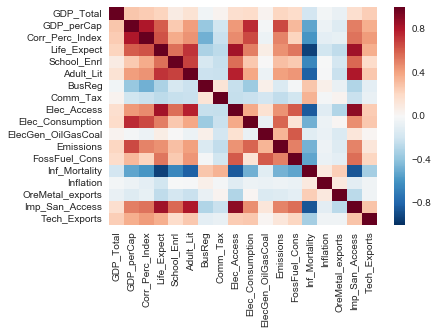

In [12]:
sns.heatmap(df.corr())

### Imputation of Elec_Consumption
The  imputation of Electricity Consumption will be completed first, as it could be a predictor for Electricity Generation from Oil/Gas/Coal (Our next imputation)

In [14]:
# Prepare list of columns to subset for X_test assignment
ElecConCols = ['Corr_Perc_Index', 'Life_Expect', 'School_Enrl', 'Adult_Lit', 'Elec_Access', 'Emissions', 
               'Imp_San_Access', 'Tech_Exports', 'BusReg', 'Comm_Tax', 'Inf_Mortality']

# Return series of non-null Elec_Consumption values
y_train = df[df['Elec_Consumption'].notnull()]['Elec_Consumption']

# Assign index of target to variable: rowToUse
rowsToUse = y_train.index

# Subset rowsToUse rows and ElecConCols columns: X_train
X_train = df.loc[rowsToUse, ElecConCols]

# Assign subset of df where Elec_Consumption is null: X_test
X_test = df[df['Elec_Consumption'].isnull()][ElecConCols]

#Print head
X_test.head()

,Corr_Perc_Index,Life_Expect,School_Enrl,Adult_Lit,Elec_Access,Emissions,Imp_San_Access,Tech_Exports,BusReg,Comm_Tax,Inf_Mortality
8,19.163289,54.857304,0.912828,86.221981,5.665851,0.025136,46.918182,4.077354,6.00,151.250000,65.154545
11,32.836346,56.707676,0.871955,29.420324,14.727507,0.128553,17.281818,8.055484,4.75,43.933333,71.400000
15,57.249064,74.563040,1.009733,98.213142,99.370766,5.503937,91.281818,0.035608,7.20,41.800000,11.354545
18,32.750000,69.717989,0.993582,82.776817,89.656829,1.504874,88.845455,1.734805,9.00,32.891667,16.327273
21,65.521602,74.844984,1.009489,98.213142,100.000000,5.289006,93.445455,14.560626,8.00,34.716667,13.590909


In [15]:
from scipy.stats import zscore

#Zscore our training set
X_train = X_train.apply(zscore)

#Zscore our testing set 
X_test = X_test.apply(zscore)

In [16]:
# Import a number of modelling packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

# Instantiate a number of models
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge(alpha=0.1)
model4 = ElasticNet()
model5 = RandomForestRegressor(min_samples_leaf=2, n_estimators=14, n_jobs=3, random_state=47)
model6 = BaggingRegressor()
model7 = GradientBoostingRegressor()

# Fit the instantiated models to our training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
# Print the scores of each model
print('Linear Reg: {}'.format(model1.score(X_train, y_train)))
print('Lasso: {}'.format(model2.score(X_train, y_train)))
print('Ridge: {}'.format(model3.score(X_train, y_train)))
print('ElasticNet: {}'.format(model4.score(X_train, y_train)))
print('Rand Forest: {}'.format(model5.score(X_train, y_train)))
print('Bagging: {}'.format(model6.score(X_train, y_train)))
print('Gradient Boost: {}'.format(model7.score(X_train, y_train)))

Linear Reg: 0.541113800654
Lasso: 0.541111639759
Ridge: 0.541113117425
ElasticNet: 0.508869929461
Rand Forest: 0.802377180357
Bagging: 0.889463444164
Gradient Boost: 0.99896424555


In [18]:
# Use model 7 (Best performer) to impute the y-values 
y_pred = model7.predict(X_test)

#### Inserter 
* Iterates through the index of X_test to assign to our dataframe values that the model has generated 

In [19]:
# Inserts the generated values into df using index of X_test
for i in X_test.index:
    countIndex=0
    # Assign our generated value to index
    df['Elec_Consumption'][i]=y_pred[countIndex]
    countIndex+=1

/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Imputation of Electricity Generation from Oil/Gas/Coal

In [20]:
# Prepare list of columns to subset for X_test assignment
OilGasCoalCols = ['BusReg', 'Elec_Access', 'Emissions', 'FossFuel_Cons','OreMetal_exports', 'Comm_Tax',
                  'Elec_Consumption']

# Return series of non-null Elec_Consumption values: y_train
y_train = df[df['ElecGen_OilGasCoal'].notnull()]['ElecGen_OilGasCoal']

# Assign index of y_train to variable: rowToUse
rowsToUse = y_train.index

# Subset rowsToUse rows and OilGasCoalCols columns: X_train
X_train = df.loc[rowsToUse, OilGasCoalCols]

# Assign subset of df where ElecGen_OilGasCoal is null: X_test
X_test = df[df['ElecGen_OilGasCoal'].isnull()][OilGasCoalCols]

# Print head
X_test.head()

,BusReg,Elec_Access,Emissions,FossFuel_Cons,OreMetal_exports,Comm_Tax,Elec_Consumption
8,6.00,5.665851,0.025136,17.055152,6.505781,151.250000,613.239302
11,4.75,14.727507,0.128553,17.055152,2.344383,43.933333,613.239302
15,7.20,99.370766,5.503937,0.000000,8.549015,41.800000,613.239302
18,9.00,89.656829,1.504874,0.000000,0.032866,32.891667,613.239302
21,8.00,100.000000,5.289006,0.000000,1.356809,34.716667,613.239302


In [21]:
from scipy.stats import zscore

# Zscore our training set
X_train = X_train.apply(zscore)

# Zscore our testing set
X_test = X_test.apply(zscore)

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


# Instantiate a number of models
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge(alpha=0.1)
model4 = ElasticNet()
model5 = RandomForestRegressor(min_samples_leaf=2, n_estimators=14, n_jobs=3, random_state=7)
model6 = BaggingRegressor()
model7 = GradientBoostingRegressor(learning_rate=0.3)
model8 = KNeighborsRegressor(p=1, n_neighbors=2, leaf_size=30)


# Fit the instantiated models to our training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=1,
          weights='uniform')

In [23]:
# Print the scores of each model
print('Linear Reg: {}'.format(model1.score(X_train, y_train)))
print('Lasso: {}'.format(model2.score(X_train, y_train)))
print('Ridge: {}'.format(model3.score(X_train, y_train)))
print('ElasticNet: {}'.format(model4.score(X_train, y_train)))
print('Rand Forest: {}'.format(model5.score(X_train, y_train)))
print('Bagging: {}'.format(model6.score(X_train, y_train)))
print('Gradient Boost: {}'.format(model7.score(X_train, y_train)))
print('KNN: {}'.format(model8.score(X_train, y_train)))

Linear Reg: 0.539615828983
Lasso: 0.529128209284
Ridge: 0.539613839071
ElasticNet: 0.413621918566
Rand Forest: 0.891105006753
Bagging: 0.920757717561
Gradient Boost: 0.999886259384
KNN: 0.745616793731


In [24]:
# Use model 7 (Best performer) to impute the y-values 
y_pred = model7.predict(X_test)
y_pred

array([  95.2398037 ,  100.1714224 ,   54.92236492,    7.98220248,
         56.30452063,    5.435506  ,   98.08428751,   16.94048212,
         13.26015505,   29.37685472,   11.85747585,   97.79866448,
         18.17186707,   15.71620208,   14.95267339,   19.27670623,
         35.11791082,  101.37656751,   21.70549403,   93.53036154,
        100.12114894,  105.9586862 ,   99.68579885,   20.97242161,
         96.09538547,   29.47525083,   29.44581195,   56.7092634 ,
         11.08836516,    8.24914904,   95.47523096,   22.80424286,
         29.35977519,   18.9087242 ])

#### Inserter 
* Iterates through the index of X_test to assign to our dataframe values that the model has generated 

In [25]:
# Inserts the generated values into df using index of X_test
for i in X_test.index:
    countIndex=0
    
    df['ElecGen_OilGasCoal'][i]=y_pred[countIndex]
    countIndex+=1

/Users/d/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Perform final imputation check
Below is a final null value sum check before we export the fully imputed data

In [26]:
# Show sum of null values by column in descending order
df.isnull().sum().sort_values(ascending=False)

Tech_Exports          0
Imp_San_Access        0
WB_Code               0
Region                0
Income_Group          0
GDP_Total             0
GDP_perCap            0
Corr_Perc_Index       0
Life_Expect           0
School_Enrl           0
Adult_Lit             0
BusReg                0
Comm_Tax              0
Elec_Access           0
Elec_Consumption      0
ElecGen_OilGasCoal    0
Emissions             0
FossFuel_Cons         0
Inf_Mortality         0
Inflation             0
OreMetal_exports      0
Country               0
dtype: int64

# Export our Fully imputed data frame

In [ ]:
# Export our fully imputed data frame to csv
df.to_csv('./datasets/GDP_QOL_IMP_COM.csv', index=False, encoding='utf-8')